In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

spark = SparkSession.builder.getOrCreate()

In [3]:
import re
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
df_1 = spark.read.option("header",True).csv("/Users/a18223352/Documents/hse/research_seminar_part2/hw_pyspark/data")

In [16]:
df_1.printSchema()

root
 |-- words: string (nullable = true)



In [17]:
df_1.groupBy('words').count().show()

+------------+-----+
|       words|count|
+------------+-----+
|       света|   17|
|  оживленной|    1|
|      ранний|    2|
|       Летой|    1|
|     смотрит|    5|
|        XVII|    8|
|      книжки|    1|
|      модных|    8|
|      спешит|    4|
|        кляч|    1|
|     циклопы|    1|
|Благословляя|    1|
|     прошлой|    2|
|     ручьями|    1|
|     тяжелым|    1|
|        себя|   14|
|      куклою|    2|
|       завыл|    1|
|  Автомедоны|    1|
|       ехали|    1|
+------------+-----+
only showing top 20 rows



In [18]:
df_sorted = df_1.groupBy('words').count().sort(col("count").desc())

In [19]:
df_sorted.show(10)

+-----+-----+
|words|count|
+-----+-----+
|    И|  564|
|    и|  441|
|    в|  412|
|   не|  272|
|    В|  193|
|   он|  189|
|   на|  173|
|   Но|  165|
|    с|  164|
|    я|  146|
+-----+-----+
only showing top 10 rows



In [20]:
pd_df = spark.createDataFrame(df_sorted.take(10)).toPandas()

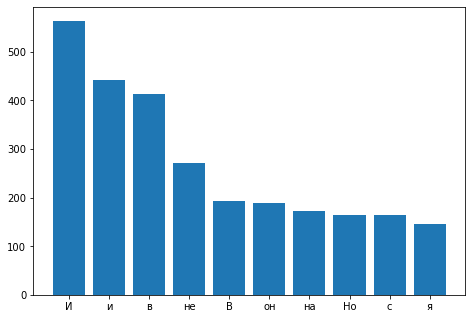

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(pd_df['words'],pd_df['count'])
plt.show()